Temporal Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#file1 = 'D:/Projects/Underwater Plastic Waste Detection/Code/Marine_Microplastic_Concentrations .csv'
file2 = 'D:/Projects/Underwater Plastic Waste Detection/Code/Marine_Microplastics.csv'

df = pd.read_csv(file2)

df.head()


,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,...,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,8/11/2015 12:00:00 AM,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000
1,6427,Pacific Ocean,NaN,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,12/18/2002 12:00:00 AM,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000
2,10672,Pacific Ocean,NaN,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,...,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,10/17/2006 12:00:00 AM,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000
3,13921,Atlantic Ocean,NaN,NaN,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,...,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,10/17/2018 12:00:00 AM,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825
4,9344,Pacific Ocean,NaN,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,1/3/2015 12:00:00 AM,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,-99.697800,16.623000


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

C:\Users\Vasu Sumeet Seth\AppData\Local\Temp\ipykernel_35964\1639360499.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df = df.dropna(subset=['Measurement'])

In [6]:
df['Oceans'] = df['Oceans'].astype('category')
df['Regions'] = df['Regions'].astype('category')

In [7]:
sns.set(style="darkgrid")

In [8]:
yearly_density = df.groupby(['Year', 'Oceans'])['Measurement'].mean().reset_index()

yearly_density_pivot = yearly_density.pivot(index='Year', columns='Oceans', values='Measurement')

C:\Users\Vasu Sumeet Seth\AppData\Local\Temp\ipykernel_35964\770236683.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_density = df.groupby(['Year', 'Oceans'])['Measurement'].mean().reset_index()


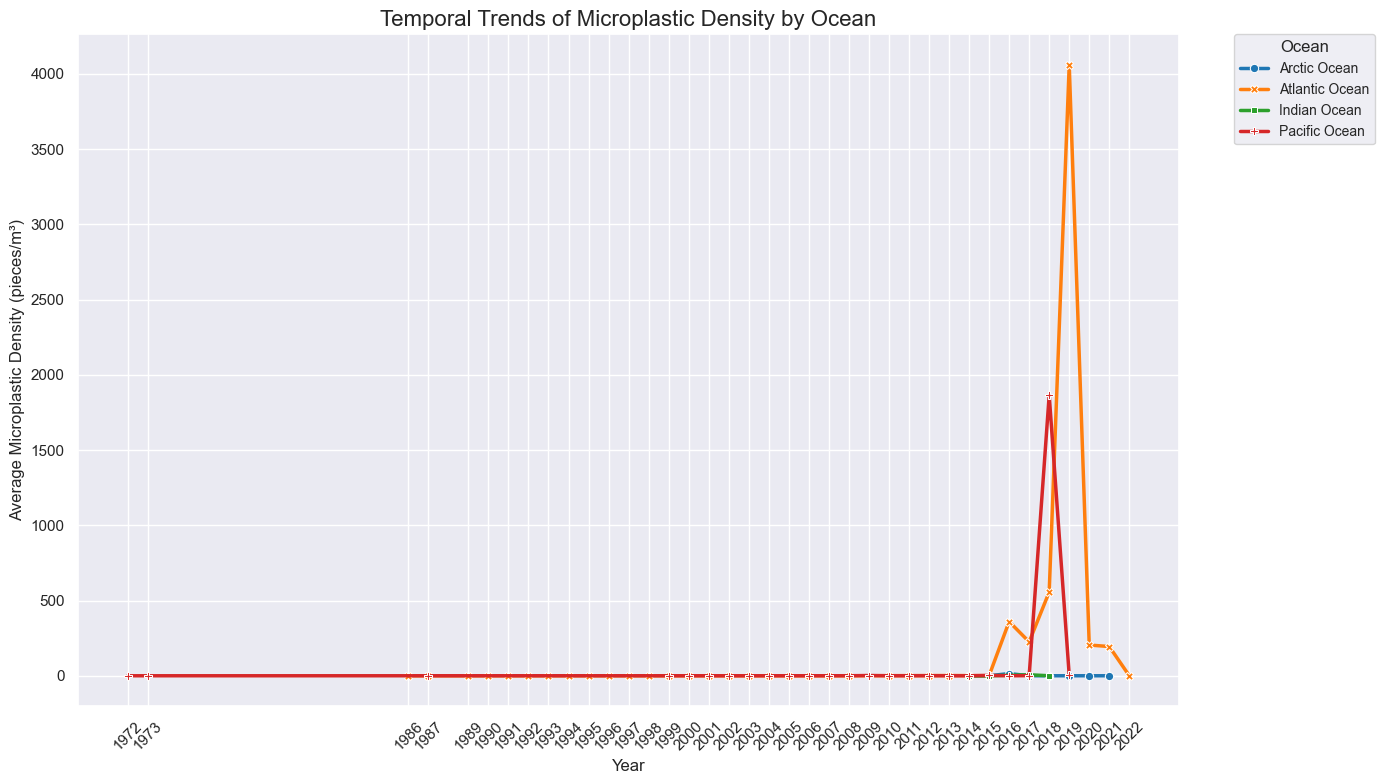

In [9]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=yearly_density_pivot,
    dashes=False,
    markers=True,
    linewidth=2.5,
    palette='tab10'  # 
)

plt.title('Temporal Trends of Microplastic Density by Ocean', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Microplastic Density (pieces/m³)', fontsize=12)


plt.legend(
    title='Ocean',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=10
)

plt.xticks(yearly_density_pivot.index, rotation=45)

plt.tight_layout()
plt.grid(True)
plt.show()

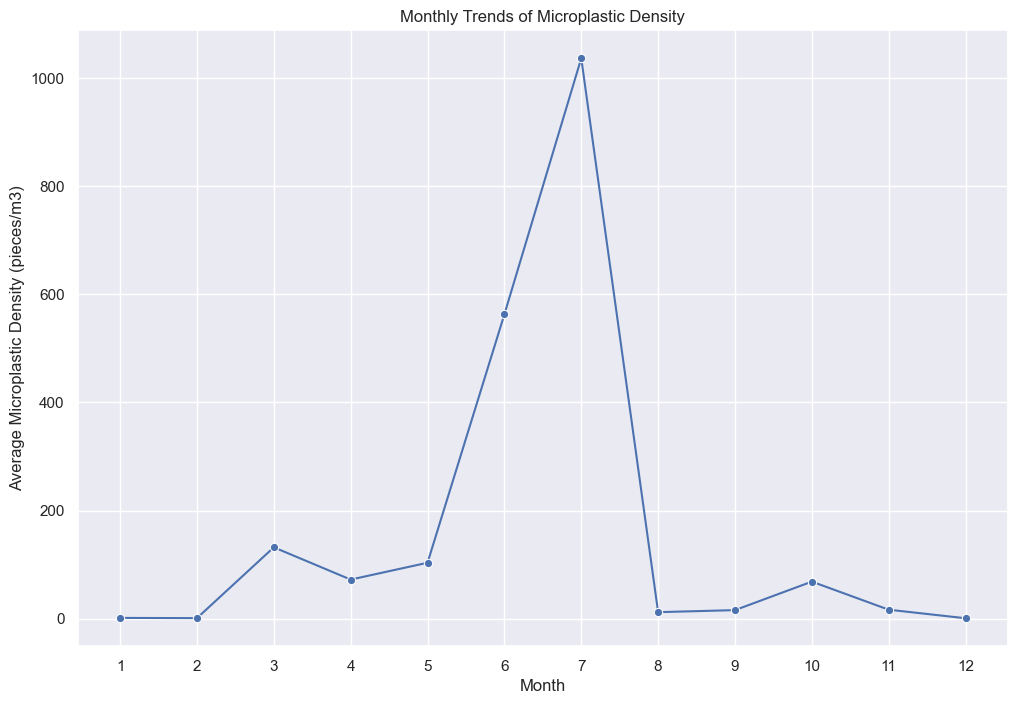

In [10]:
monthly_density = df.groupby('Month')['Measurement'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_density, x='Month', y='Measurement', marker='o')
plt.title('Monthly Trends of Microplastic Density')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, 1))
plt.show()

C:\Users\Vasu Sumeet Seth\AppData\Local\Temp\ipykernel_35964\536054311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


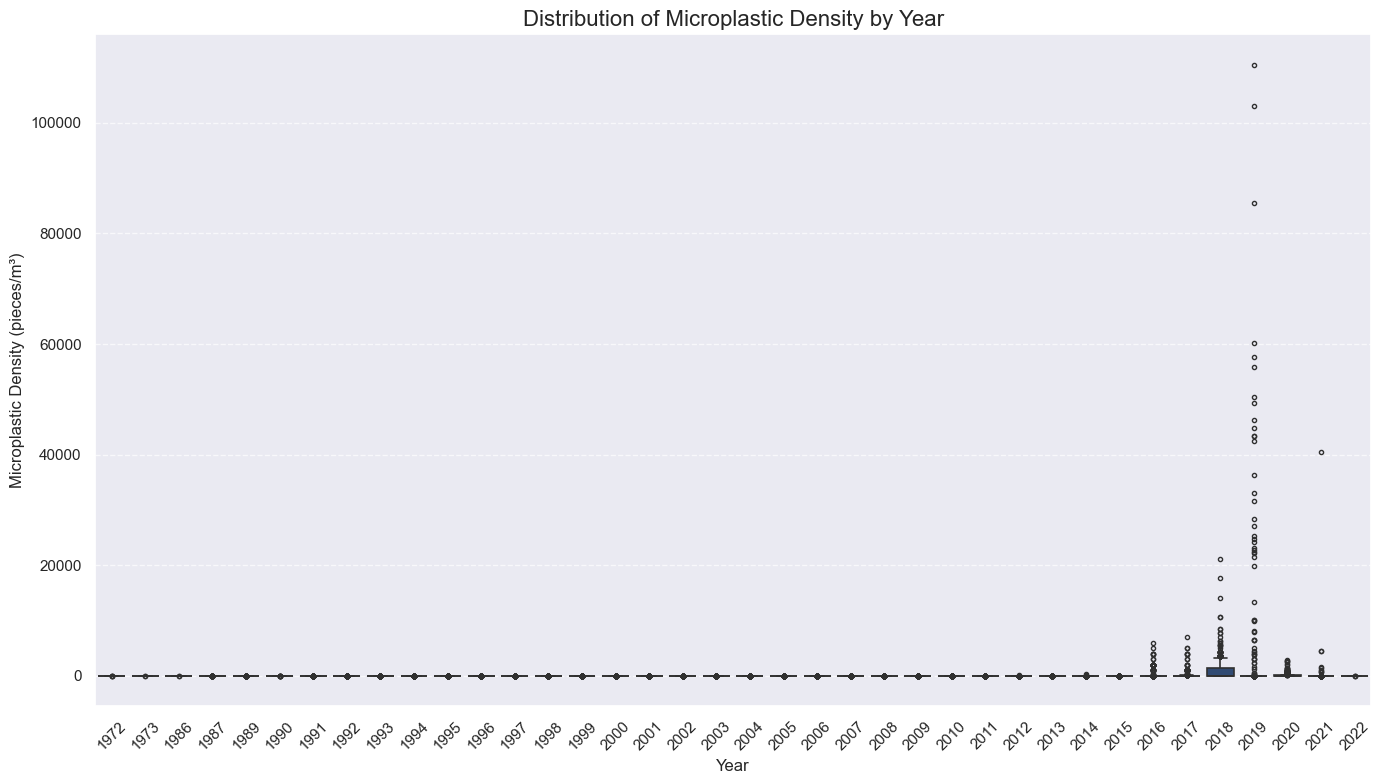

In [11]:
plt.figure(figsize=(14, 8))


sns.boxplot(
    data=df,
    x='Year',
    y='Measurement',
    palette='crest', 
    linewidth=1.2,
    fliersize=3    
)          



# Customize labels and title
plt.title('Distribution of Microplastic Density by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Microplastic Density (pieces/m³)', fontsize=12)

# Improve tick readability
plt.xticks(rotation=45)

# Clean layout
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

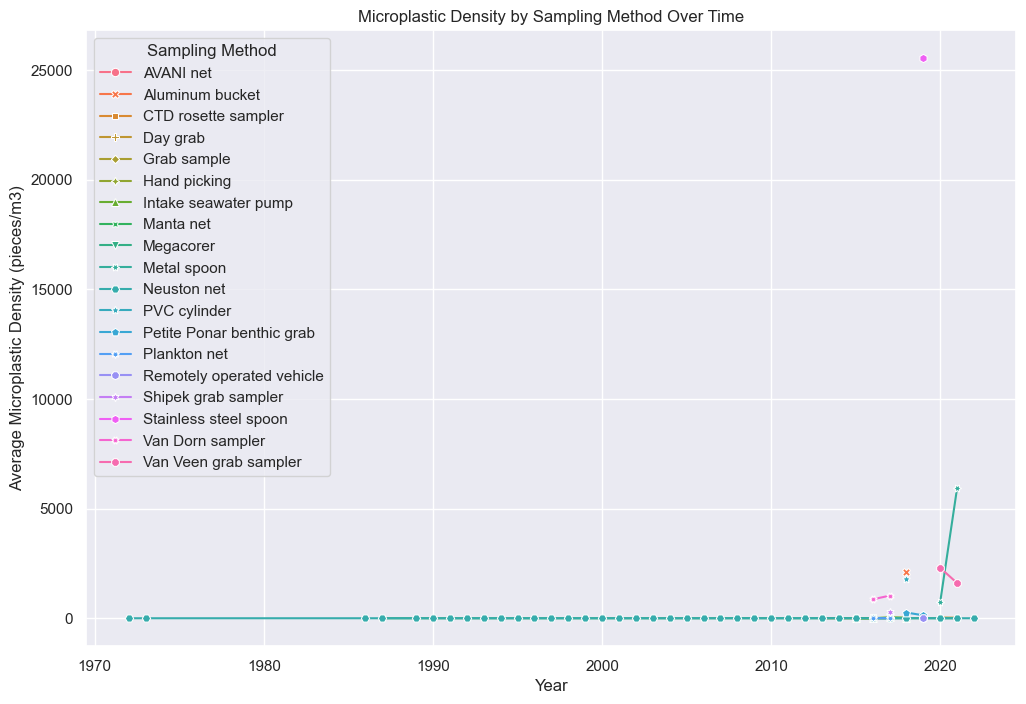

In [12]:
yearly_density_method = df.groupby(['Year', 'Sampling Method'])['Measurement'].mean().reset_index()


yearly_density_method_pivot = yearly_density_method.pivot(index='Year', columns='Sampling Method', values='Measurement')

plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_density_method_pivot,dashes=False, markers=True)
plt.title('Microplastic Density by Sampling Method Over Time')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Year')
plt.legend(title='Sampling Method')
plt.show()

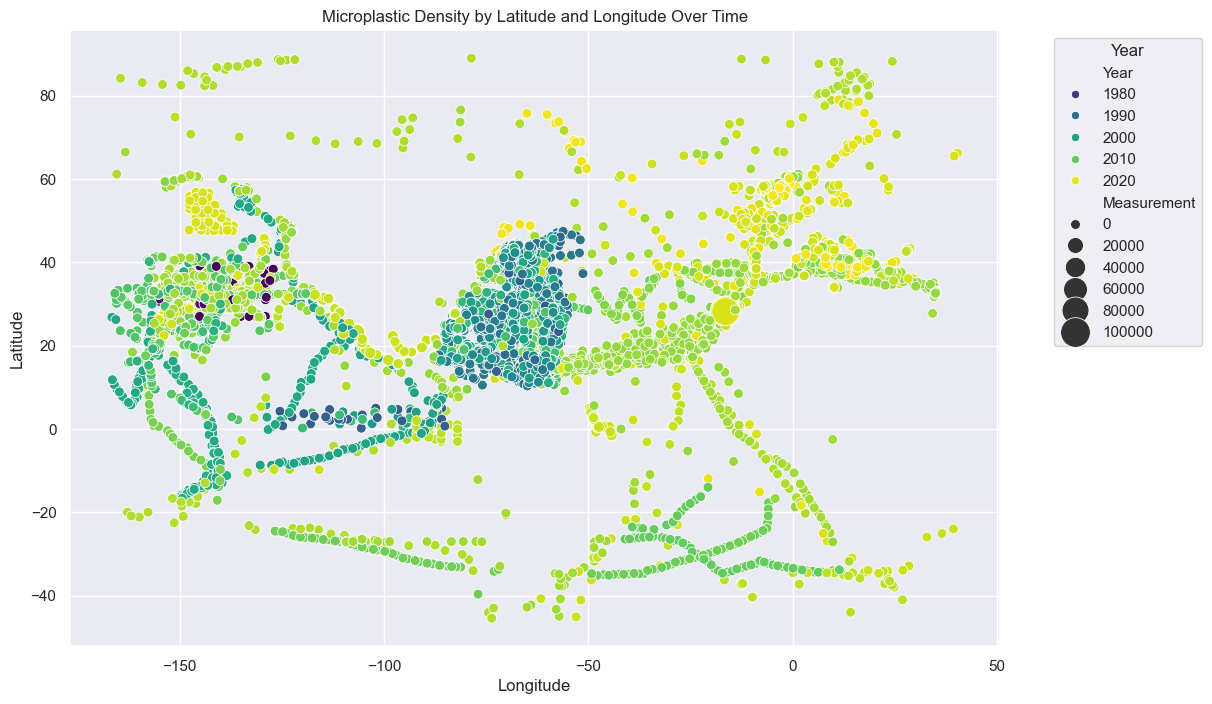

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Year', size='Measurement', palette='viridis', sizes=(50, 500))
plt.title('Microplastic Density by Latitude and Longitude Over Time')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Vasu Sumeet Seth\AppData\Local\Temp\ipykernel_35964\332741887.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_density, x='Season', y='Measurement', palette='coolwarm')


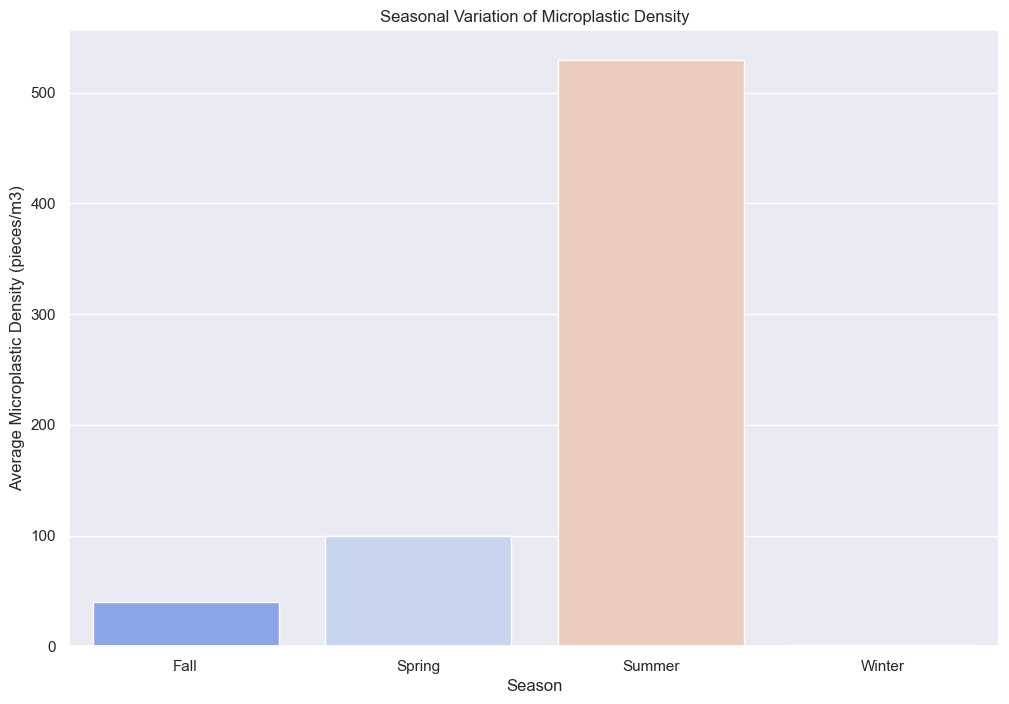

In [15]:
df['Season'] = df['Month'] % 12 // 3 + 1
df['Season'] = df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Group by season and calculate the mean density
seasonal_density = df.groupby('Season')['Measurement'].mean().reset_index()

# Plot the seasonal variation of microplastic density
plt.figure(figsize=(12, 8))
sns.barplot(data=seasonal_density, x='Season', y='Measurement', palette='coolwarm')
plt.title('Seasonal Variation of Microplastic Density')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Season')
plt.show()

C:\Users\Vasu Sumeet Seth\AppData\Local\Temp\ipykernel_35964\162391739.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_density_by_year_region = df.groupby(['Year', 'Regions'])['Measurement'].mean().reset_index()


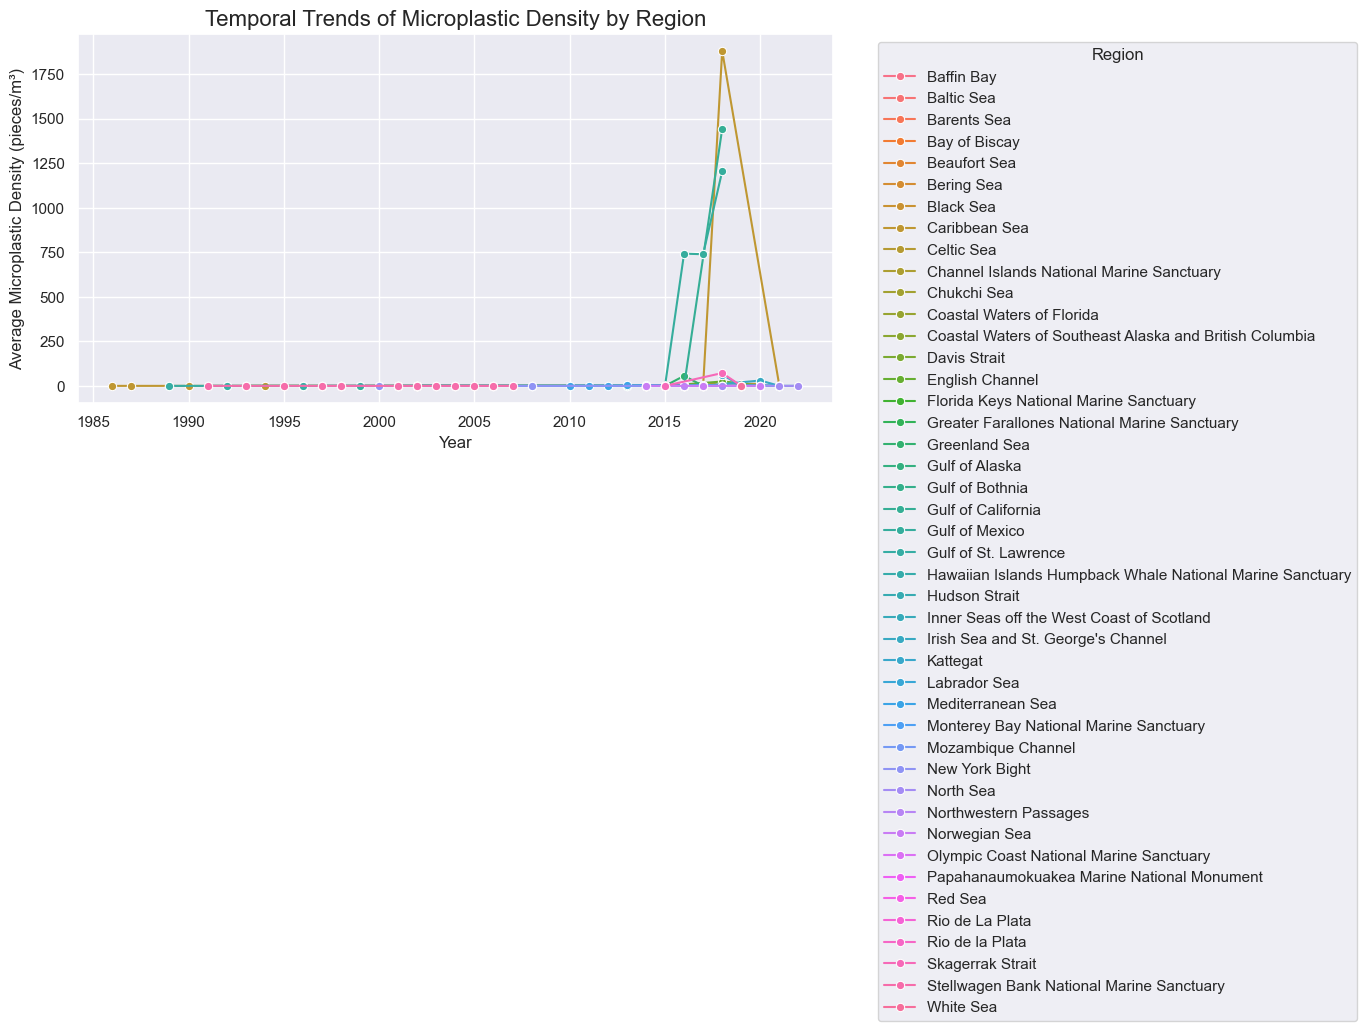

In [16]:
avg_density_by_year_region = df.groupby(['Year', 'Regions'])['Measurement'].mean().reset_index()


avg_density_by_year_region = avg_density_by_year_region.sort_values('Year')


plt.figure(figsize=(14, 8))
sns.lineplot(
    data=avg_density_by_year_region,
    x='Year',
    y='Measurement',
    hue='Regions',
    marker='o'
)

# Customize the plot
plt.title('Temporal Trends of Microplastic Density by Region', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Microplastic Density (pieces/m³)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

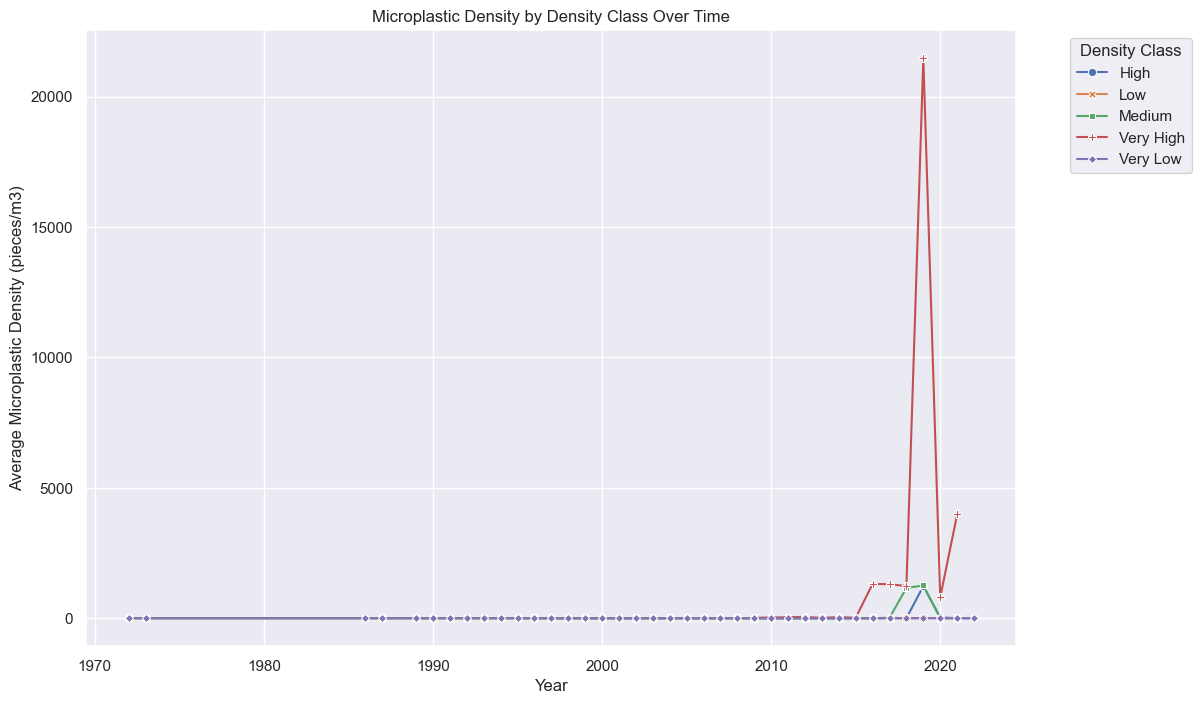

In [17]:
yearly_density_class = df.groupby(['Year', 'Density Class'])['Measurement'].mean().reset_index()


yearly_density_class_pivot = yearly_density_class.pivot(index='Year', columns='Density Class', values='Measurement')


plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_density_class_pivot, dashes=False,markers=True)
plt.title('Microplastic Density by Density Class Over Time')
plt.ylabel('Average Microplastic Density (pieces/m3)')
plt.xlabel('Year')
plt.legend(title='Density Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

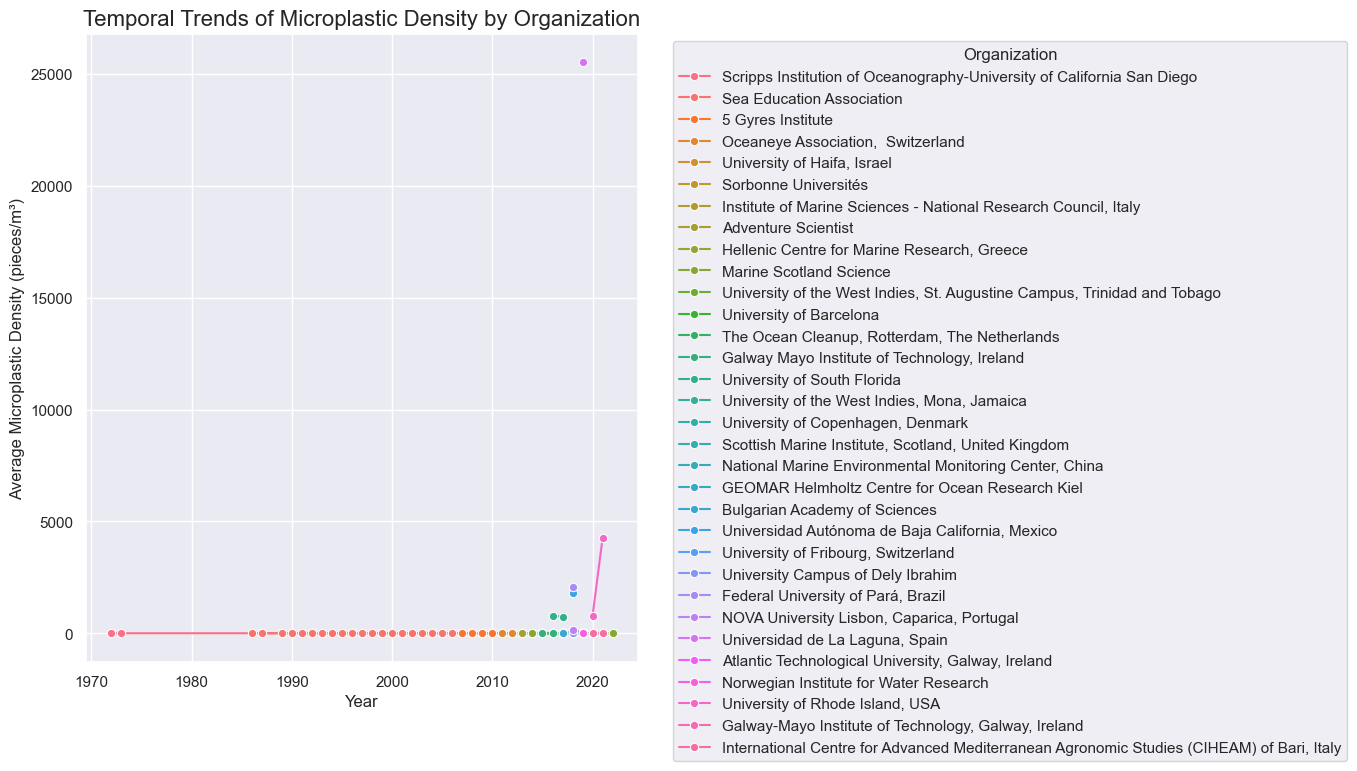

In [ ]:
avg_density_by_year_org = df.groupby(['Year', 'Organization'])['Measurement'].mean().reset_index()


avg_density_by_year_org = avg_density_by_year_org.sort_values('Year')


plt.figure(figsize=(14, 8))
sns.lineplot(
    data=avg_density_by_year_org,
    x='Year',
    y='Measurement',
    hue='Organization',
    marker='o'
)

plt.title('Temporal Trends of Microplastic Density by Organization', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Microplastic Density (pieces/m³)', fontsize=12)
plt.legend(title='Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Vasu Sumeet Seth\AppData\Local\Temp\ipykernel_35964\291225250.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Vasu Sumeet Seth\AppData\Local\Temp\ipykernel_35964\291225250.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('Date')[['Measurement']].resample('M').mean()


ADF Statistic: -17.867108510720445
p-value: 3.0375903008114257e-30


C:\Users\Vasu Sumeet Seth\AppData\Local\Temp\ipykernel_35964\291225250.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1),
C:\Users\Vasu Sumeet Seth\AppData\Local\Temp\ipykernel_35964\291225250.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([plot_df, forecast_df]).sort_index()


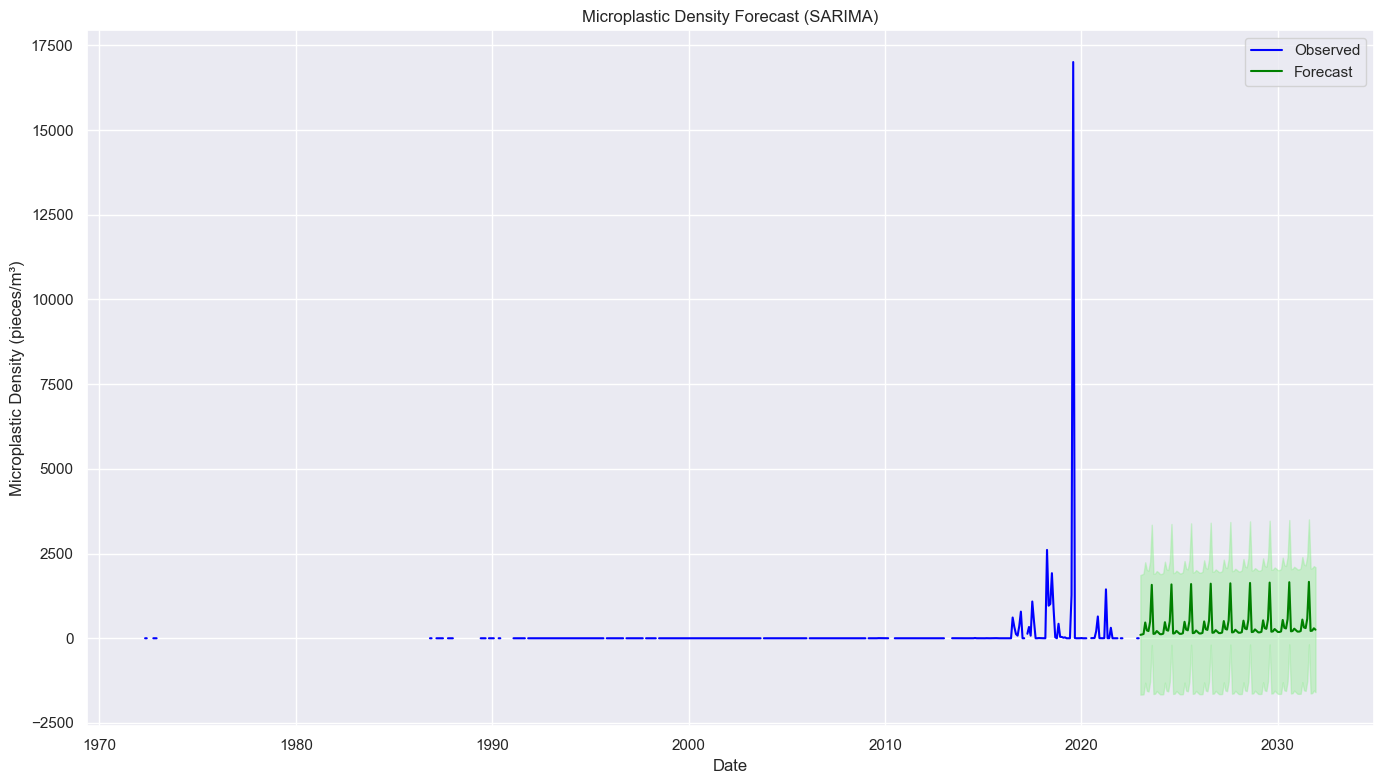

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np

# Load and preprocess data
df = pd.read_csv(file2)
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Measurement'])

# Resample to monthly data
df_monthly = df.set_index('Date')[['Measurement']].resample('M').mean()

# Check stationarity
result = adfuller(df_monthly['Measurement'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Fit SARIMA model
model = SARIMAX(df_monthly['Measurement'], 
                order=(1,1,1),               # p,d,q
                seasonal_order=(1,1,1,12))   # P,D,Q,s
results = model.fit(disp=False)

# 1. Determine the last date in your historical data
last_date = df_monthly.index[-1]

# 2. Create forecast index starting from the next month 
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), 
                              periods=108, 
                              freq='M')

# 3. Generate forecast with the correct steps
forecast = results.get_forecast(steps=108)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# 4. Set the correct index for the forecast data
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# 5. Create a combined dataframe for plotting that includes a small overlap
# This ensures visual continuity
plot_df = pd.DataFrame({
    'Historical': df_monthly['Measurement'],
    'Forecast': None
})

# Add forecast to the combined dataframe
forecast_df = pd.DataFrame({
    'Historical': None,
    'Forecast': forecast_mean
}, index=forecast_index)

# Concatenate and sort by date
combined_df = pd.concat([plot_df, forecast_df]).sort_index()

# Plot with both series to ensure continuity
plt.figure(figsize=(14, 8))
plt.plot(combined_df.index, combined_df['Historical'], label='Observed', color='blue')
plt.plot(combined_df.index, combined_df['Forecast'], label='Forecast', color='green')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='lightgreen', alpha=0.4)

plt.title('Microplastic Density Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Microplastic Density (pieces/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


